In [1]:
from __future__ import print_function
import torch.backends.cudnn as cudnn
import torch
import torchvision.transforms as transforms

import argparse
import os
import random
import sys
import pprint

import datetime
import dateutil
import dateutil.tz
from PIL import Image
import csv
import matplotlib.pyplot as plt
import numpy as np


dir_path = '/home/avoyd/GANtor-Arts-Center/src/code/main.py'
sys.path.append(dir_path)

from miscc.datasets import TextDataset
from miscc.config import cfg, cfg_from_file
from miscc.utils import mkdir_p
from trainer import GANTrainer

In [2]:
# Works for 64
image_transform = transforms.Compose([
            transforms.RandomCrop(cfg.IMSIZE),
            
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = TextDataset(cfg.DATA_DIR, split='train',
                      imsize=cfg.IMSIZE,
                      transform=image_transform)

print(cfg.IMSIZE)

num_gpu = 1

assert dataset
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=cfg.TRAIN.BATCH_SIZE * num_gpu,
    drop_last=True, shuffle=True, num_workers=int(cfg.WORKERS))


256


(3, 256, 256)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64)


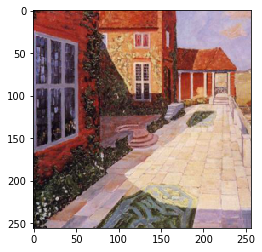

In [4]:
for i, data in enumerate(dataloader, 0):
    img, context = data
    curr_img = img
    curr_img = curr_img.numpy()
    curr_img = curr_img[0]
    curr_img = 255. * (curr_img - curr_img.min())/ (curr_img.max() - curr_img.min())
    pilTrans = transforms.ToPILImage()
    #pilImg = pilTrans(curr_img)
    print(curr_img.shape)
    plt.imshow(curr_img.transpose(1, 2, 0).astype('uint8'))
#     imgplot.show()
    print(context[0])
    break